In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data)
df.columns = housing.feature_names
df['PRICE'] = housing.target

X = df.drop('PRICE', axis = 1)
Y = df['PRICE']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
len(X_test)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


4128

In [10]:
def visualize_data (x_, y_test, y_predict, title):
    plt.figure(figsize=(25, 9))
    plt.title("{}".format(title),fontdict={'fontsize':'25'})
    plt.xlabel('No.')
    plt.ylabel('Prediction')
    
    plt.plot(x_, y_test, label='Actual', linestyle='solid', color='green', linewidth=2)
    plt.scatter(x_, y_test, color='green')
    plt.plot(x_, y_predict, label='Predict', linestyle='solid', color='blue', linewidth=2)
    plt.scatter(x_, y_predict, color='blue')
    plt.legend()
    plt.show()
def evaluate(X_train,y_train, X_test,y_test, model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print("Training score:", train_score )
    print("Test score: ", test_score)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    rmse_train = sklearn.metrics.mean_squared_error(y_train, pred_train, squared = False)
    rmse_test = sklearn.metrics.mean_squared_error(y_test, pred_test, squared = False)
    print('RMSE training set:', rmse_train)
    print('RMSE testing set:', rmse_test)
    #return rmse_train, rmse_test, train_score, test_score

In [4]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, Y_train)

Y_pred = linear.predict(X_test)

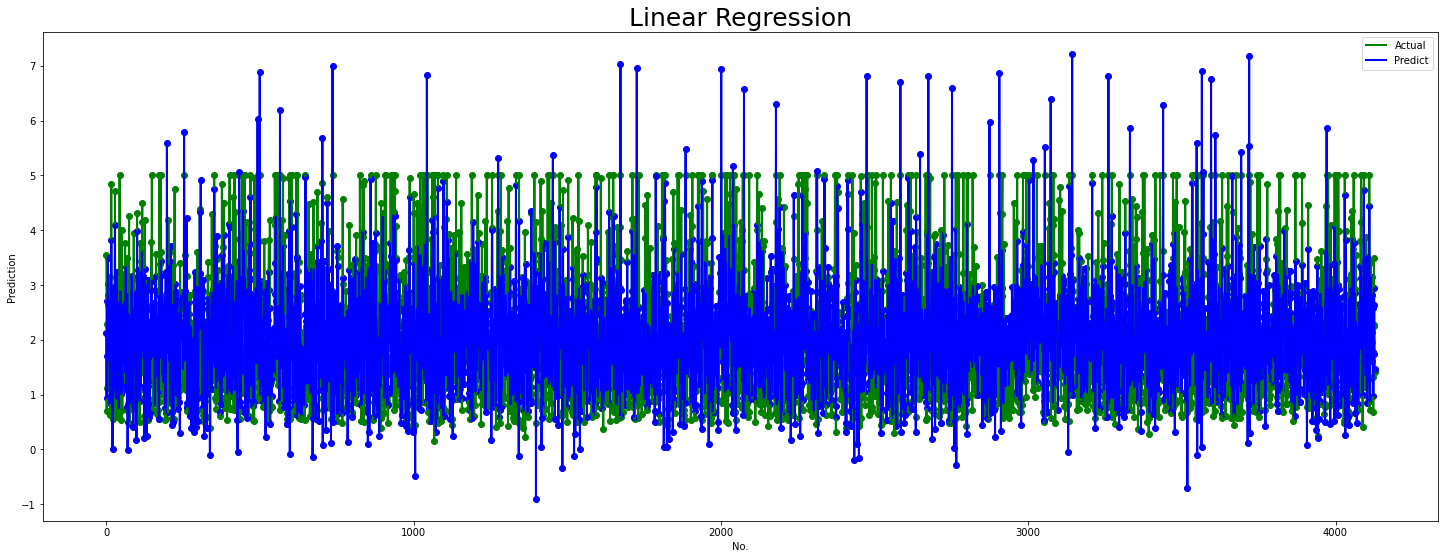

Training score: 0.6083741964648376
Test score:  0.5965968374812349
RMSE training set: 0.7233688180364037
RMSE testing set: 0.7274202599183854


In [11]:
x_ = np.arange(len(X_test))
visualize_data(x_, Y_test, Y_pred,"Linear Regression")
evaluate(X_train,Y_train, X_test,Y_test, linear)

Text(0, 0.5, 'Predicted Prices')

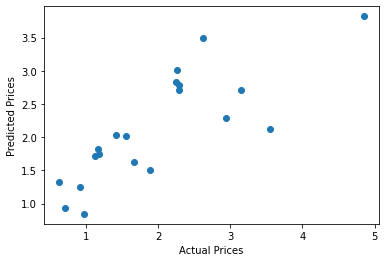

In [12]:
plt.scatter(Y_test.head(20), Y_pred[:20]) #test là 1 pd.series còn pred là 1 np.array
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

In [14]:
linear.coef_

array([ 4.38565392e-01,  9.68722037e-03, -1.04705005e-01,  6.32189474e-01,
       -3.67690711e-06, -3.44771323e-03, -4.25964056e-01, -4.40601114e-01])